Import the required Libraries

In [15]:
import pandas as pd
import numpy as np

%matplotlib inline

Load the Dataset

In [17]:
jan_2024_df = pd.read_parquet('Datasets/yellow_tripdata_2024-01.parquet')
taxi_df = pd.concat([jan_2024_df])

view data

taxi_df.head()

print the shape of the dataset

In [24]:
taxi_df.shape

(2964624, 19)

view the colum's

In [27]:
taxi_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee'],
      dtype='object')

In [29]:
taxi_df = taxi_df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'payment_type', 
                   'PULocationID', 'DOLocationID', 'total_amount']]

In [31]:
taxi_df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,2,186,79,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,1,140,236,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,1,236,79,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,1,79,211,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,1,211,148,16.10


visualizing data through histograms

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'payment_type'}>],
       [<Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

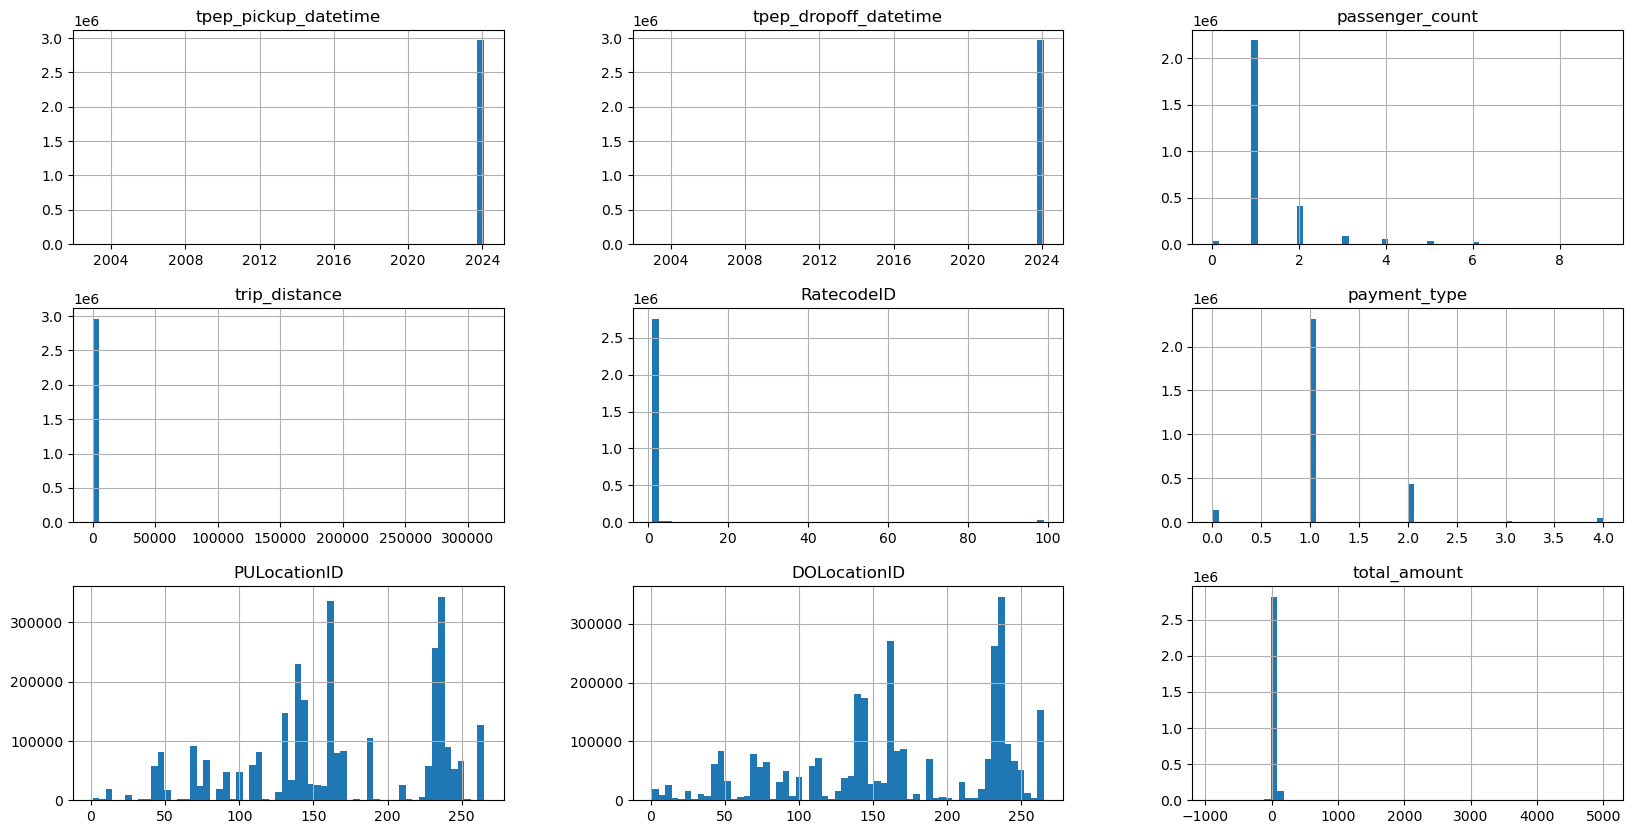

In [38]:
taxi_df.hist(figsize=(20,10), bins=60)

analysing the histogram

In [53]:
taxi_df['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

In [55]:
taxi_df['total_amount'].value_counts()

total_amount
16.80     45432
12.60     43275
21.00     36556
15.12     26687
15.96     26396
          ...  
584.18        1
323.28        1
201.93        1
128.09        1
118.96        1
Name: count, Length: 19241, dtype: int64

total amount column is not properly distributed, 

<Axes: xlabel='index', ylabel='total_amount'>

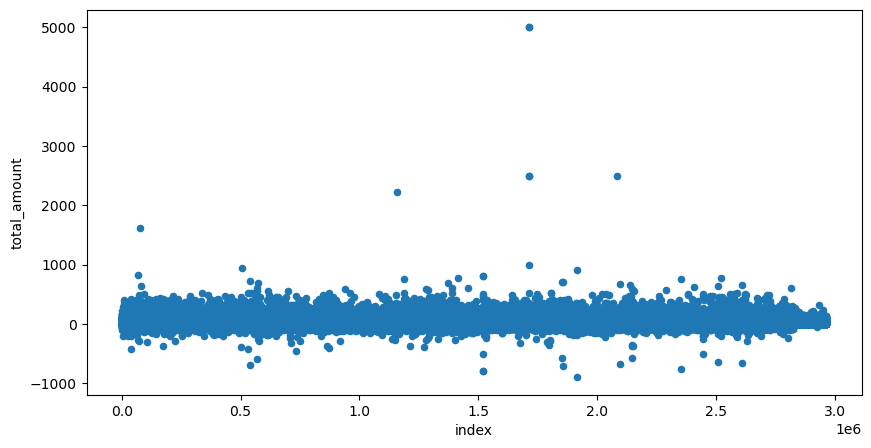

In [60]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

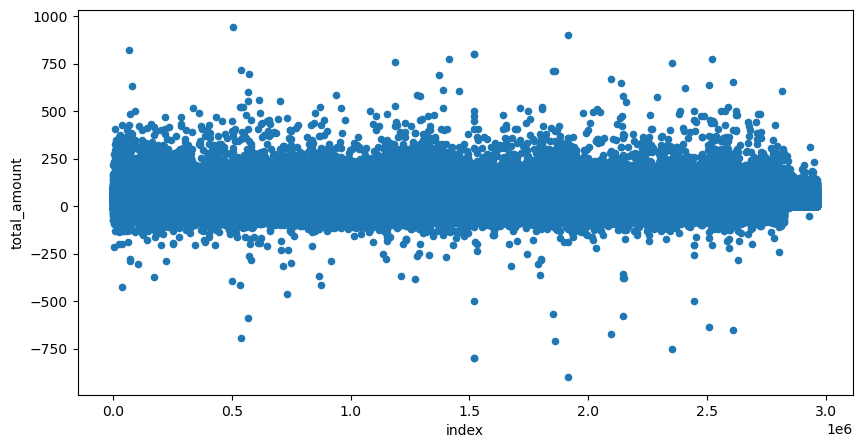

In [66]:
taxi_df[taxi_df['total_amount']<1000].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

there are two things to deal with negative values and very large values, for now we are dealing with negative values.

In [73]:
taxi_df[taxi_df['total_amount']<0].shape

(35504, 9)

plotting the values which are lesser than 0 (Negative values)

<Axes: xlabel='index', ylabel='total_amount'>

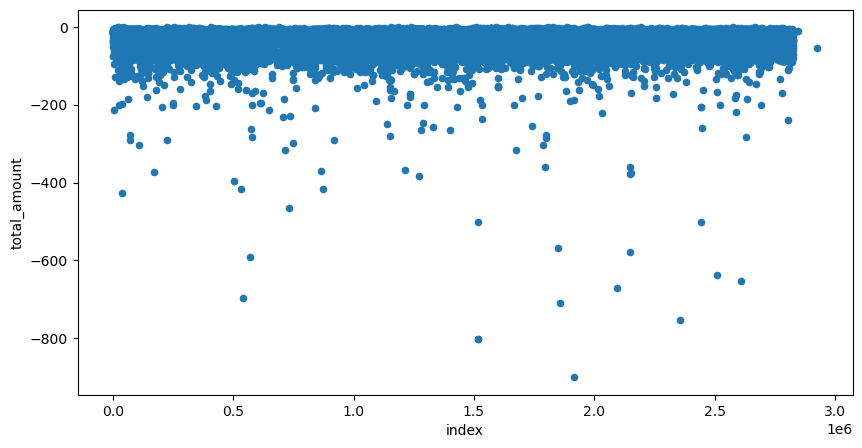

In [78]:
taxi_df[taxi_df['total_amount']<0].reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [80]:
taxi_df[taxi_df['total_amount']<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
99,2024-01-01 00:18:24,2024-01-01 00:30:39,1.0,2.16,1.0,4,249,232,-18.50
506,2024-01-01 00:04:00,2024-01-01 00:04:44,1.0,0.01,5.0,2,63,63,-34.25
536,2024-01-01 00:41:42,2024-01-01 00:46:00,1.0,0.47,1.0,4,249,113,-10.80
552,2024-01-01 00:42:02,2024-01-01 01:14:33,1.0,5.48,1.0,2,107,61,-38.10
682,2024-01-01 00:24:02,2024-01-01 01:10:32,1.0,8.74,1.0,4,90,225,-52.80


In [82]:
taxi_df[taxi_df['total_amount']<0]['payment_type'].value_counts()

payment_type
4    21406
2     8326
3     5741
1       29
0        2
Name: count, dtype: int64

<Axes: >

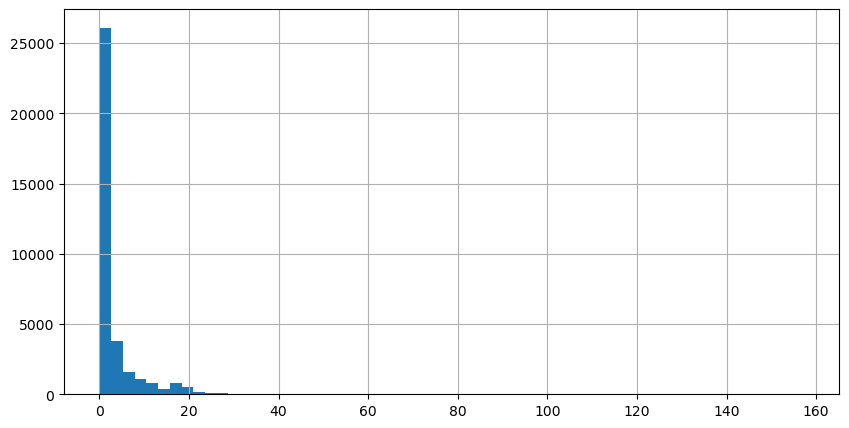

In [88]:
taxi_df[taxi_df['total_amount']<0]['trip_distance'].hist(bins=60, figsize=(10,5))

In [92]:
taxi_df[taxi_df['total_amount']==0].shape

(416, 9)

In [94]:
taxi_df[taxi_df['total_amount']==0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount
854,2024-01-01 00:27:42,2024-01-01 00:28:49,1.0,0.2,1.0,4,239,143,0.0
29224,2024-01-01 10:01:27,2024-01-01 10:01:27,1.0,0.0,5.0,2,239,264,0.0
39191,2024-01-01 13:46:41,2024-01-01 14:12:06,1.0,0.0,99.0,1,42,216,0.0
39591,2024-01-01 13:03:22,2024-01-01 13:03:24,1.0,0.0,1.0,2,264,264,0.0
39592,2024-01-01 13:05:28,2024-01-01 13:05:35,1.0,0.0,1.0,2,193,193,0.0


In [102]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].value_counts()

trip_distance
0.00     287
0.10      21
0.20       8
0.90       8
0.50       7
1.60       6
1.00       5
0.80       5
0.70       5
1.10       4
0.30       4
1.30       4
0.60       4
0.40       3
3.00       3
2.50       3
2.40       2
3.40       2
3.80       2
1.80       2
1.70       2
10.70      2
12.10      1
25.10      1
1.40       1
12.80      1
1.74       1
2.70       1
18.40      1
15.00      1
5.30       1
3.30       1
2.90       1
17.10      1
4.20       1
3.50       1
4.00       1
21.90      1
16.50      1
26.20      1
13.60      1
7.70       1
3.60       1
5.50       1
5.80       1
4.90       1
8.10       1
1.20       1
7.00       1
Name: count, dtype: int64

<Axes: >

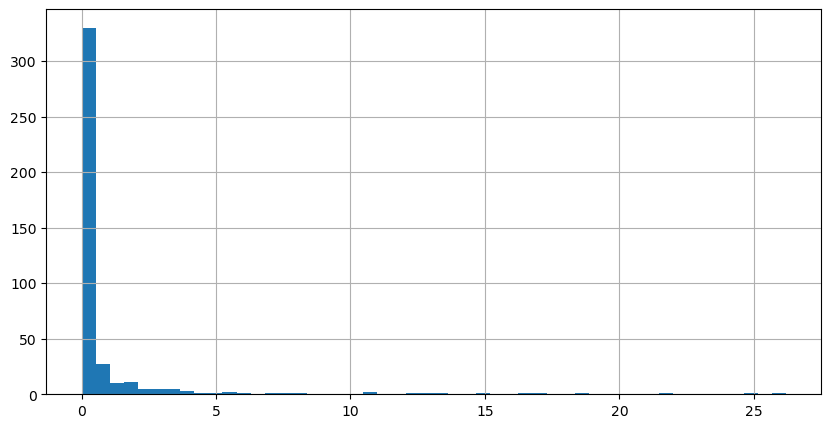

In [96]:
taxi_df[taxi_df['total_amount']==0]['trip_distance'].hist(bins=50, figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

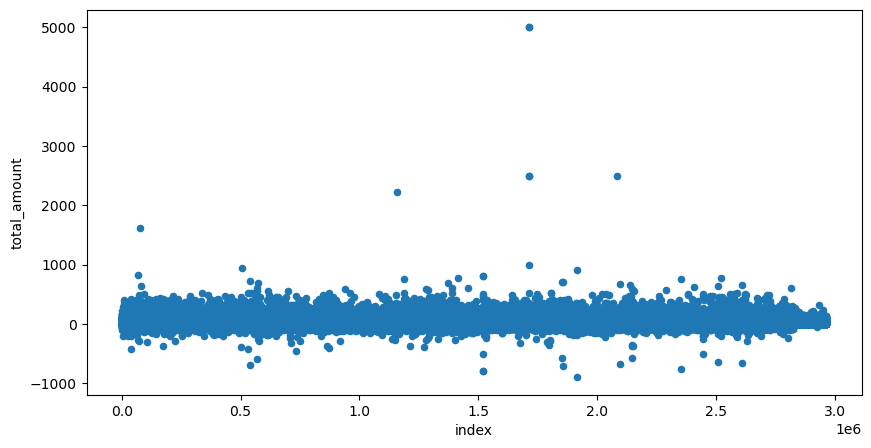

In [106]:
taxi_df.reset_index().plot(kind='scatter', y='total_amount', x='index', figsize=(10,5))

In [124]:
taxi_df[taxi_df['total_amount']>210].shape

(1693, 9)

average value what people are spending on a taxi

In [127]:
taxi_df['total_amount'].mean()

26.801504770925415

Data Cleaning


In [140]:
taxi_data = taxi_df[(taxi_df['total_amount']>=0)&(taxi_df['total_amount']<200)]

In [146]:
print(taxi_df.shape)
taxi_data.shape

(2964624, 9)


(2927107, 9)

checking for Missing values

In [149]:
taxi_data.isna().sum()

tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          140153
trip_distance                 0
RatecodeID               140153
payment_type                  0
PULocationID                  0
DOLocationID                  0
total_amount                  0
dtype: int64

fill the missing values

In [154]:
taxi_data['passenger_count'].fillna(1, inplace=True)
taxi_data['RatecodeID'].fillna(taxi_data['RatecodeID'].mode()[0], inplace=True)
taxi_data.isna().sum()

C:\Users\Githendra Gowda\AppData\Local\Temp\ipykernel_3872\2221785585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi_data['passenger_count'].fillna(1, inplace=True)
C:\Users\Githendra Gowda\AppData\Local\Temp\ipykernel_3872\2221785585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_data['passenger_count'].fillna(1, inplace=T

tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
payment_type             0
PULocationID             0
DOLocationID             0
total_amount             0
dtype: int64

Data Preparation

In [157]:
taxi_data_prepared = taxi_data.copy()

In [159]:
 taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
payment_type                      int64
PULocationID                      int32
DOLocationID                      int32
total_amount                    float64
dtype: object

In [161]:
taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
taxi_data_prepared.loc[:, 'DOLocationID'] = taxi_data_prepared['DOLocationID'].astype(str)
taxi_data_prepared.loc[:, 'payment_type'] = taxi_data_prepared['payment_type'].astype(str)


C:\Users\Githendra Gowda\AppData\Local\Temp\ipykernel_3872\289756399.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:, 'RatecodeID'] = taxi_data_prepared['RatecodeID'].astype(str)
C:\Users\Githendra Gowda\AppData\Local\Temp\ipykernel_3872\289756399.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['186' '140' '236' ... '211' '107' '138']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_data_prepared.loc[:, 'PULocationID'] = taxi_data_prepared['PULocationID'].astype(str)
C:\Users\Githendra Gowda\AppData\Local\Temp\ipykernel_3872\289756399.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future e

In [163]:
 taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                       object
payment_type                     object
PULocationID                     object
DOLocationID                     object
total_amount                    float64
dtype: object

In [205]:
taxi_data_prepared['transaction_date'] = pd.to_datetime(taxi_data_prepared['tpep_pickup_datetime'].dt.date)

taxi_data_prepared['transaction_year'] = taxi_data_prepared['tpep_pickup_datetime'].dt.year
taxi_data_prepared['transaction_month'] = taxi_data_prepared['tpep_pickup_datetime'].dt.month
taxi_data_prepared['transaction_day'] = taxi_data_prepared['tpep_pickup_datetime'].dt.day
taxi_data_prepared['transaction_hour'] = taxi_data_prepared['tpep_pickup_datetime'].dt.hour

In [207]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,PULocationID,DOLocationID,total_amount,transaction_data,transaction_year,transaction_month,transaction_day,transaction_hour,transaction_date
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,2,186,79,22.70,2024-01-01,2024,1,1,0,2024-01-01
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,1,140,236,18.75,2024-01-01,2024,1,1,0,2024-01-01
2,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,1,236,79,31.30,2024-01-01,2024,1,1,0,2024-01-01
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,1,79,211,17.00,2024-01-01,2024,1,1,0,2024-01-01
4,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,1,211,148,16.10,2024-01-01,2024,1,1,0,2024-01-01


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_data'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>,
        <Axes: title={'center': 'transaction_date'}>, <Axes: >]],
      dtype=object)

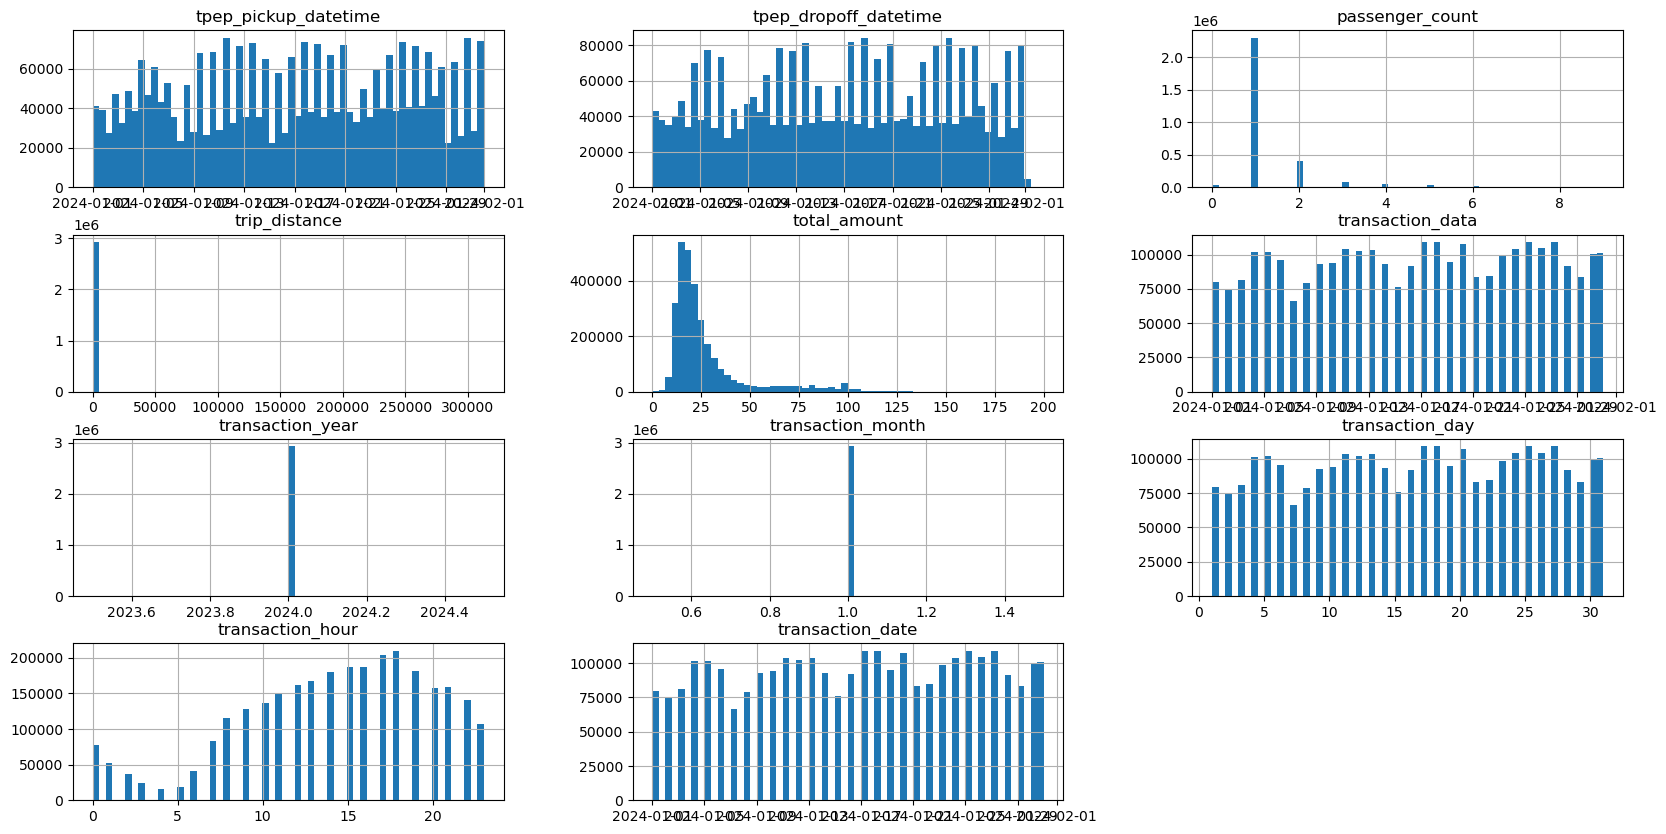

In [209]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

In [213]:
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_year']==2024]
taxi_data_prepared = taxi_data_prepared[taxi_data_prepared['transaction_month']==1]

noting down Numerical and Categorical values

In [215]:
categorical_columns = ['PULocationID', 'transaction_date', 'transaction_month', 'transaction_day', 'transaction_hour']
numerical_columns = ['trip_distance', 'total_amount']
all_needed_columns = categorical_columns + numerical_columns

In [217]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(2927090, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,186,2024-01-01,1,1,0,1.72,22.70
1,140,2024-01-01,1,1,0,1.80,18.75
2,236,2024-01-01,1,1,0,4.70,31.30
3,79,2024-01-01,1,1,0,1.40,17.00
4,211,2024-01-01,1,1,0,0.80,16.10


Aggregate Data Points

In [220]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region['count_of_transactions'] = main_taxi_df.groupby(categorical_columns).count().reset_index()['total_amount']
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(77432, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2


<Axes: >

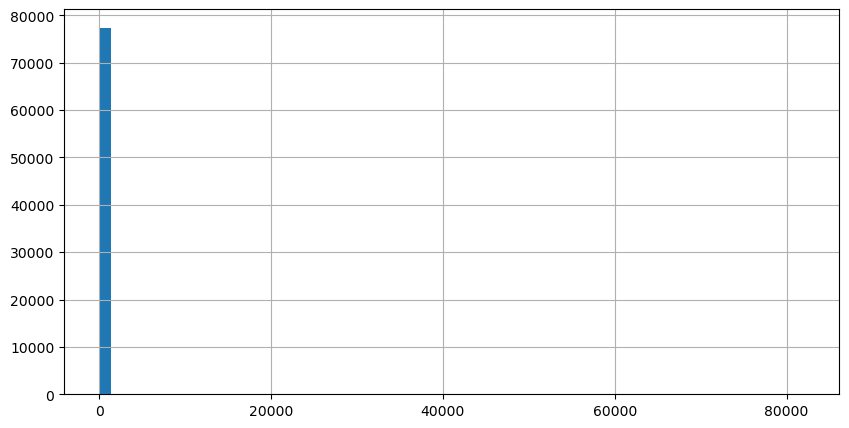

In [224]:
taxi_grouped_by_region['trip_distance'].hist(bins=60, figsize=(10,5))

<Axes: >

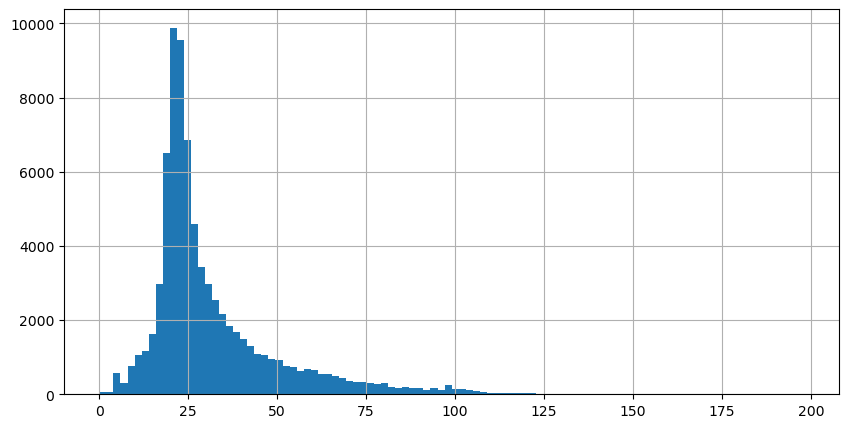

In [226]:
taxi_grouped_by_region['total_amount'].hist(bins=100, figsize=(10,5))

creating a benchmark model

In [228]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [230]:
categorical_feature_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_feature_benchmark + ['trip_distance']
target_feature_benchmark = 'total_amount'

Train-Test Split

In [233]:
from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# One Hot Encoding
X_bench = pd.get_dummies(X_bench)

X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)


fit the model

In [236]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

Model Evaluation

In [242]:
model_at_hand = tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 6.413520410294036
mean_squared_error 154.38898766790518
root_mean_squared_error 12.425336521314229
r2 0.585355884643874


<Axes: xlabel='true', ylabel='pred'>

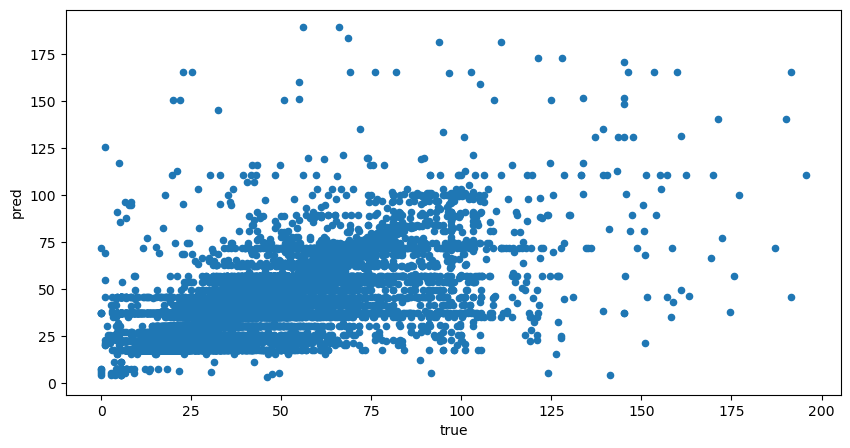

In [244]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(10,5), kind='scatter', x='true', y='pred')

In [246]:
categorical_feature_benchmark = ['PULocationID', 'transaction_month', 'transaction_day', 'transaction_hour']
input_features_benchmark = categorical_feature_benchmark
target_feature_benchmark = 'total_amount'

from sklearn.model_selection import train_test_split

X_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# One Hot Encoding
X_bench = pd.get_dummies(X_bench)

X_train, X_test, y_train, y_test = train_test_split(X_bench, y_bench, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10)
tree.fit(X_train, y_train)

model_at_hand = tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 11.438426878693438
mean_squared_error 283.38143823149073
root_mean_squared_error 16.833937098358504
r2 0.23891951402263212


let's see how this fits on the plot

<Axes: xlabel='true', ylabel='pred'>

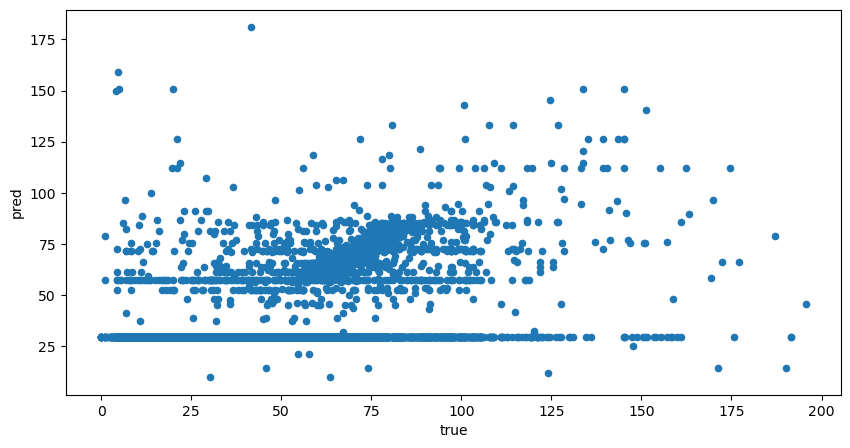

In [248]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(10,5), kind='scatter', x='true', y='pred')

feature engineering

In [266]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2024-01-01,1,1,5,0.000000,109.200000,1
1,1,2024-01-01,1,1,6,0.020000,76.000000,3
2,1,2024-01-01,1,1,13,0.000000,108.983333,3
3,1,2024-01-01,1,1,14,0.001667,85.680000,6
4,1,2024-01-01,1,1,15,0.000000,145.620000,2
5,1,2024-01-01,1,1,16,17.000000,142.800000,1
6,1,2024-01-01,1,1,17,0.015000,100.812500,4
7,1,2024-01-02,1,2,5,0.000000,124.700000,1
8,1,2024-01-02,1,2,6,0.000000,145.200000,1
9,1,2024-01-02,1,2,7,0.000000,84.970000,2


In [254]:
data_with_new_features = taxi_grouped_by_region.copy()

Data related features

In [260]:
data_with_new_features['transaction_week_day'] = data_with_new_features['transaction_date'].dt.weekday
data_with_new_features['weekend'] = data_with_new_features['transaction_week_day'].apply(lambda x: True if x == 5 or x == 6 else False)

In [262]:
from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018',
                        end='2020').date
data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)

C:\Users\Githendra Gowda\AppData\Local\Temp\ipykernel_3872\2463167083.py:6: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_with_new_features['is_holiday'] = data_with_new_features['transaction_date'].isin(holidays)


In [274]:
data_with_new_features.tail()

Borough Information

In [278]:
zone_lookup = pd.read_csv('datasets/taxi_zone_lookup.csv')
zone_lookup = zone_lookup[['LocationID','Borough']]
zone_lookup['LocationID'] = zone_lookup['LocationID'].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [280]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')
data_with_new_features.drop('LocationID', axis=1, inplace=True)
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False,EWR


In [282]:
data_with_new_features['Borough'].value_counts()

Borough
Manhattan        42075
Queens           14978
Brooklyn         13558
Bronx             5283
Unknown            722
EWR                181
Staten Island       68
Name: count, dtype: int64

In [284]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,Borough
0,1,2024-01-01,1,1,5,0.000000,109.200000,1,0,False,False,EWR
1,1,2024-01-01,1,1,6,0.020000,76.000000,3,0,False,False,EWR
2,1,2024-01-01,1,1,13,0.000000,108.983333,3,0,False,False,EWR
3,1,2024-01-01,1,1,14,0.001667,85.680000,6,0,False,False,EWR
4,1,2024-01-01,1,1,15,0.000000,145.620000,2,0,False,False,EWR


In [286]:
data_for_model = data_with_new_features.copy()

In [288]:
categorical_features = ['PULocationID', 'transaction_month', 'transaction_day',
       'transaction_hour', 'transaction_week_day', 'weekend', 'is_holiday', 'Borough']
input_features = categorical_features
target_feature = 'total_amount'

Train Test Split

In [291]:
from sklearn.model_selection import train_test_split

X = data_for_model[input_features]
y = data_for_model[target_feature]

# one-hot encode
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Decision Tree

In [294]:
from sklearn.tree import DecisionTreeRegressor 

decision_tree = DecisionTreeRegressor(max_depth=10)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [296]:
model_at_hand = decision_tree

y_pred = model_at_hand.predict(X_test)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
print('mean_squared_error', mean_squared_error(y_test, y_pred))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test, y_pred)))
print('r2', r2_score(y_test, y_pred))

mean_absolute_error 9.914147128446853
mean_squared_error 254.17077626852554
root_mean_squared_error 15.942734278301371
r2 0.3173708936939196


<Axes: xlabel='true', ylabel='pred'>

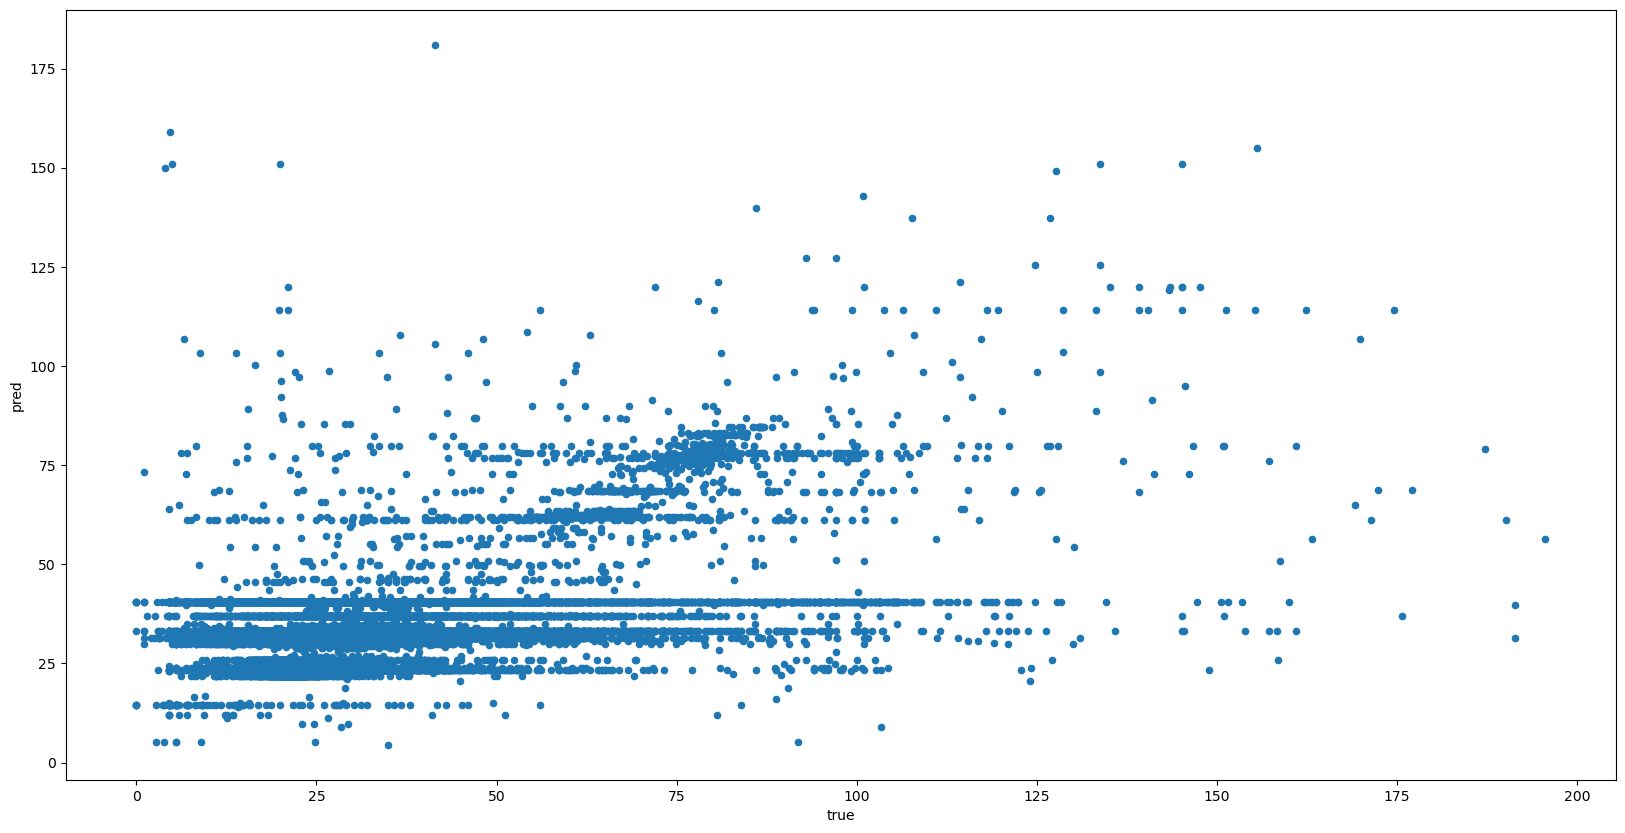

In [298]:
data = {'true': y_test, 'pred': y_pred}
results = pd.DataFrame(data)

results.plot(figsize=(20,10), kind='scatter', x='true', y='pred')

In [300]:
X_train_overfit = X_train
y_train_overfit = y_train

X_test_overfit = X_test
y_test_overfit = y_test

In [302]:
rmse_scores = {'max_depth':[] ,'rmse_train':[], 'rmse_test':[]}

for md in [2, 5, 8, 10, 15, 20, 30, 50, 70, 100, 150]:
    print(md)
    decision_tree_overfit = DecisionTreeRegressor(max_depth=md)
    decision_tree_overfit.fit(X_train_overfit, y_train_overfit)
    
    model_at_hand_overfit = decision_tree_overfit
    
    y_pred_train = model_at_hand_overfit.predict(X_train_overfit)
    rmse_train = sqrt(mean_squared_error(y_train_overfit, y_pred_train))
    
    y_pred_test = model_at_hand_overfit.predict(X_test_overfit)
    rmse_test = sqrt(mean_squared_error(y_test_overfit, y_pred_test))
    
    rmse_scores['max_depth'].append(md)
    rmse_scores['rmse_train'].append(rmse_train)
    rmse_scores['rmse_test'].append(rmse_test)

2
5
8
10
15
20
30
50
70
100
150


In [304]:
pd.DataFrame.from_dict(rmse_scores)

,max_depth,rmse_train,rmse_test
0,2,1.782886e+01,17.496140
1,5,1.663061e+01,16.516102
2,8,1.596840e+01,16.125815
3,10,1.547188e+01,15.951834
4,15,1.413682e+01,16.428409
5,20,1.275310e+01,17.012857
6,30,1.016171e+01,18.484629
7,50,5.822660e+00,20.005357
8,70,2.243178e+00,20.674904
9,100,2.040219e-01,20.720780


Text(0, 0.5, 'root mean squared error')

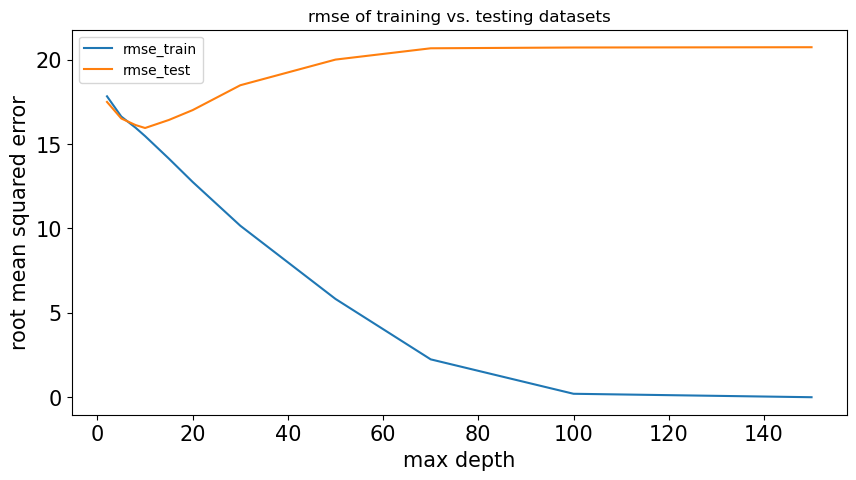

In [306]:
ax = pd.DataFrame.from_dict(rmse_scores).plot(figsize=(10,5),title="rmse of training vs. testing datasets", fontsize=15, x='max_depth')
ax.set_xlabel("max depth", fontsize=15)
ax.set_ylabel("root mean squared error", fontsize=15)

In [308]:
X_train_underfit = X_train
y_train_underfit = y_train

X_test_underfit = X_test
y_test_underfit = y_test

In [310]:
decision_tree_underfit = DecisionTreeRegressor(max_depth=1)
decision_tree_underfit.fit(X_train_underfit, y_train_underfit)

# Training performance

model_at_hand_underfit = decision_tree_underfit

y_pred_underfit = model_at_hand_underfit.predict(X_train_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_train_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_train_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_train_underfit, y_pred_underfit)))
print('r2', r2_score(y_train_underfit, y_pred_underfit))

mean_absolute_error 11.81871919540801
mean_squared_error 332.18641811046024
root_mean_squared_error 18.22598195188562
r2 0.13637275803753446


In [312]:
# Testing performance

y_pred_underfit = model_at_hand_underfit.predict(X_test_underfit)

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print('mean_absolute_error', mean_absolute_error(y_test_underfit, y_pred_underfit))
print('mean_squared_error', mean_squared_error(y_test_underfit, y_pred_underfit))
print('root_mean_squared_error', sqrt(mean_squared_error(y_test_underfit, y_pred_underfit)))
print('r2', r2_score(y_test_underfit, y_pred_underfit))

mean_absolute_error 11.775129624129642
mean_squared_error 322.48193961779583
root_mean_squared_error 17.957782146406494
r2 0.13390688940344875


Tuning

In [315]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,50,100,150,200,300,500]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 40]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 10, 20]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [317]:
import pprint as pp

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pp.pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 50, 100, 150, 200, 300, 500, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4, 10, 20],
 'min_samples_split': [2, 5, 10, 20, 40],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
